## Random Forest

In [1]:
# Import Statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

#### Data Import

In [2]:
# Read HR_Employee.csv
X = pd.read_csv('./Data/HR_Employee.csv')
# Read Attrition.csv
y = pd.read_csv('./Data/Attrition.csv')

#### Functions 

In [3]:
# Function:    fitModel
# Input:       Classifier
# Returns:     Fitted Model
def fitModel(model):
    clf = model
    clf.fit(X_train, y_train.values.ravel())
    
    return clf

In [4]:
from sklearn.metrics import accuracy_score
# Function:    modelAccuracy
# Input:       Classifier with Best Estimator
# Output:      Prints Training & Testing Accuracy
# Returns:     Y Test Predictions
def modelAccuracy(model):
    clf = model
    
    # Make Train predictions
    y_train_pred = clf.predict(X_train)
    # Calculate accuracy score
    training_accuracy = accuracy_score(y_train, y_train_pred)
    print('Training Accuracy: ',training_accuracy)
    # confusionMatrixMetrics(y_train, y_pred)

    # Make Test predictions
    y_test_pred = clf.predict(X_test)
    # Calculate accuracy scores
    testing_accuracy = accuracy_score(y_test, y_test_pred)
    print('Testing Accuracy:  ',testing_accuracy)
    
    return y_test_pred

In [5]:
from sklearn.model_selection import GridSearchCV
# Function:    gridSearcBestEstimator
# Input:       Classifier, parameters, cross validation
# Output:      Prints Best Estimator
# Returns:     Best Estimator
def gridSearcBestEstimator(model, params, cv):
    clf = model 
    gs = GridSearchCV(estimator=clf, param_grid=params, scoring='f1', cv=cv, n_jobs=-1, )

    gs.fit(X_train, y_train.values.ravel())
    best_estimator = gs.best_estimator_
    
    print('Best Estimator:')
    print(best_estimator,'\n')
    
    #if model == DecisionTreeClassifier():
    #    best_estimator.get_depth()

    return best_estimator

In [6]:
from sklearn.metrics import confusion_matrix
# Function:    confusionMatrix
# Input:       Training/Testing dataframe and predictions
# Output:      Prints Formatted Confusion Matrix
# Returns:     Confusion Matrix Array
# URL:         https://towardsdatascience.com/evaluating-machine-learning-classification-problems-in-python-5-1-metrics-that-matter-792c6faddf5
def confusionMatrix(true_test_train, pred):
    true = true_test_train
    
    cm = confusion_matrix(true, pred.round(), normalize=None)

    # Assigning columns names
    cm_df = pd.DataFrame(cm, 
                        columns = ['Predicted Negative', 'Predicted Positive'],
                        index = ['Actual Negative', 'Actual Positive'])
    
    # Printing Formatted Confusion Matrix
    print('\n',cm_df)
    
    return cm

In [7]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
# Function:    metrics
# Input:       confusion matrix array, true class values, predicted class values
# Output:      Prints Recall, Sensitivity, Precision, False Positive Rate, Balanced Accuracy & F1 Scores
def metrics(cm, true, pred):
    # Assign values from the confusion matrix to manually 
    # calculate Specificity and False Positive Rate 
    TP = cm[1][1]
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]

    # Recall
    recall = recall_score(true, pred)
    print('\nRecall:                  ', recall)
    # Sensitivity
    sensitivity = recall
    # Specificity
    specificity = (TN / float(TN + FP))
    print('Specificity:             ', specificity)
    # Precision
    precision = precision_score(true, pred)
    print('Precision:               ', precision)
    # False Positive Rate
    # fpr = (FP / float(TN + FP))
    # print ('False Positive Rate:     ', fpr)
    # Balanced Accuracy
    balanced_accuracy = (sensitivity + specificity)/2
    #balance_accuracy = metrics.balanced_accuracy_score(y_true, y_pred)
    print('Balanced Accuracy:       ', balanced_accuracy)
    # F1 Score Method 1: sklearn
    F1 = f1_score(true, pred)
    print('F1-Score:                ', F1)
    
    #return recall, specificity, precision, balanced_accuracy, F1, cm_df

In [8]:
# Function:    heatMap
# Input:       actual y values, predicted y values
# Output:      Heat Map Of Confusion Matrix
def heatMap(y_true, y_pred):
    cm_plot =  pd.crosstab(index=y_true.values.ravel(), columns=y_test_pred, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(cm_plot, annot=True, square=False, fmt='', cbar=False)
    plt.title("Confusion Matrix", fontsize = 15)
    plt.show()

### Train/Test Data Split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2020)

### Cross Validation

In [10]:
# Cross Validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

### Default Random Forest

In [11]:
rf = RandomForestClassifier()

In [12]:
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

Training Accuracy:  1.0
Testing Accuracy:   0.8503401360544217

                  Predicted Negative  Predicted Positive
Actual Negative                 369                   2
Actual Positive                  64                   6


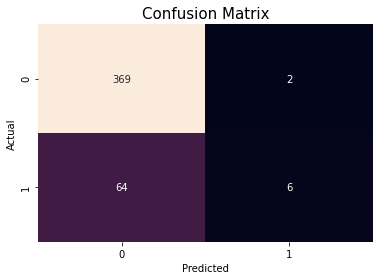


Recall:                   0.08571428571428572
Specificity:              0.9946091644204852
Precision:                0.75
Balanced Accuracy:        0.5401617250673855
F1-Score:                 0.15384615384615383


In [13]:
# Calcualate Training and Testing Accuracy
y_test_pred = modelAccuracy(rf)

# Print Confusion Matrix
cm = confusionMatrix(y_test, y_test_pred)

# Heat Map
heatMap(y_test, y_test_pred)

# Print Metrics
metrics(cm, y_test, y_test_pred)

### GridSearch - Random Forest

Best Estimator:
RandomForestClassifier(min_samples_split=5, n_estimators=250) 

Training Accuracy:  0.989310009718173
Testing Accuracy:   0.8503401360544217

                  Predicted Negative  Predicted Positive
Actual Negative                 368                   3
Actual Positive                  63                   7


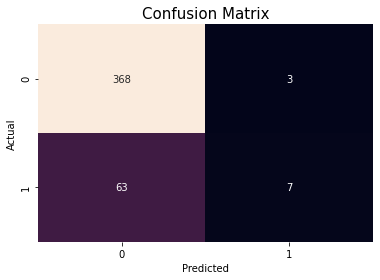


Recall:                   0.1
Specificity:              0.9919137466307277
Precision:                0.7
Balanced Accuracy:        0.5459568733153639
F1-Score:                 0.175


In [14]:
# Determine Best Estimator
params = dict(
    min_samples_split = [5, 10, 20, 30, 40, 50],
    max_depth = [1,2,3,None],
    n_estimators = [50, 100, 150, 200, 250]
)
best_estimator = gridSearcBestEstimator(RandomForestClassifier(), params, cv)

# Fit Model to best_estimator
rf_best_est = fitModel(best_estimator)

# Calcualate Training and Testing Accuracy
y_test_pred = modelAccuracy(rf_best_est)

# Print Confusion Matrix
cm = confusionMatrix(y_test, y_test_pred)

# Heat Map
heatMap(y_test, y_test_pred)

# Print Metrics
metrics(cm, y_test, y_test_pred)

##### Default
Recall:                   0.08571428571428572 <br>
Specificity:              0.9919137466307277 <br>
Precision:                0.6666666666666666 <br>
Balanced Accuracy:        0.5388140161725067 <br>
F1-Score:                 0.1518987341772152 <br>

#### Grid Search
Recall:                   0.07142857142857142 <br>
Specificity:              0.9919137466307277 <br>
Precision:                0.625 <br>
Balanced Accuracy:        0.5316711590296496 <br>
F1-Score:                 0.1282051282051282 <br>

##### Improvements from Default to GridSearch:
None - the default parameters performed very slightly better. More testing to come. 